In [16]:
import pytest
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
import pandas as pd
a = sys.path.append('../modules/')
import plot_3D, auxiliars, salve_doc, sphere, sample_random, Operators,aux_operators
import timeit
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection


In [17]:
acquisition =  {'nx': 100,
                  'ny': 100,
                  'xmin': -10000,
                  'xmax': 10000,
                  'ymin': -10000,
                  'ymax': 10000,
                  'z': -100.0,
                  'color': '.r'}

cood_bounds = {'xmax': 250.0,
                'xmin': 40.0,
                'ymax': 100.0,
                'ymin': 0.0,
                'zlim': 150,
                'z_min': 100,
                'n': 5}

mag_bounds = {'inclmax': -20.0,
                'inclmin': 15.0,
                'declmax': 20.0,
                'declmin': -15.0,
                'magmax': 5.0,
                'magmin': 1.0,
                'homogeneo': True,
                'n': 5}

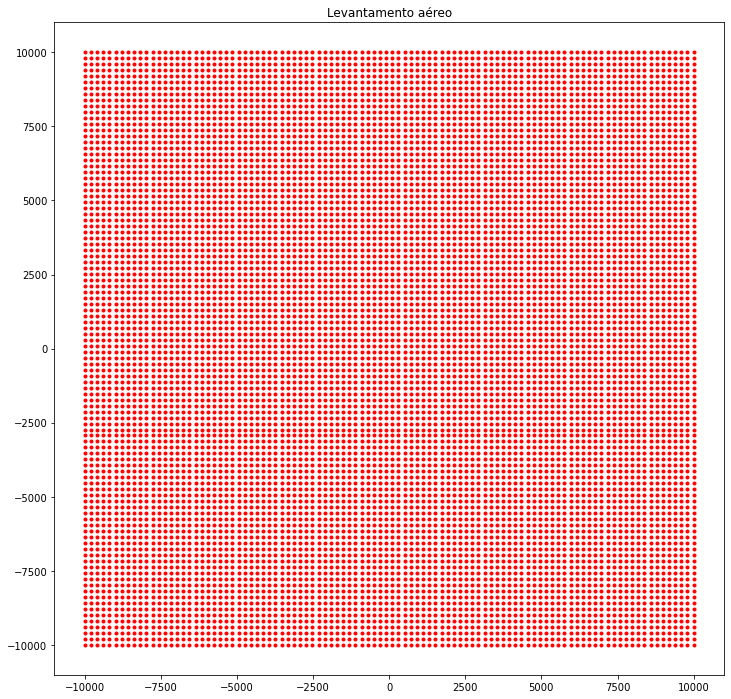

In [18]:
coodX, coodY, coodZ = sample_random.sample_random_coordinated(**cood_bounds)

incl, decl, mag = sample_random.sample_random_mag(**mag_bounds)

x, y, X, Y, Z = plot_3D.create_aquisicao(**acquisition)

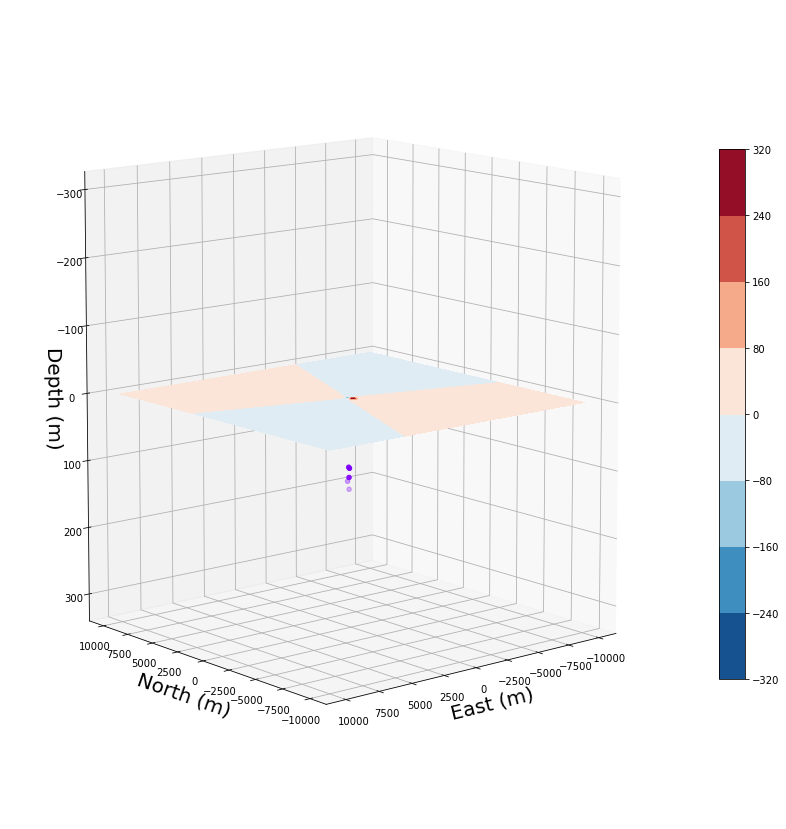

In [19]:
balls_mag = {'incl': incl,
               'decl': decl,
               'mag': mag,
               'n': 5,
               'Xref': X,
               'Yref': Y,
               'Zref': Z,
               'I': 30.0,
               'D': 50.0,
               'coodX': coodX,
               'coodY': coodY,
               'coodZ': coodZ,
               'raio': 100.0}

I = 30.0
D = 50.0

tfa_n_bolinhas = sample_random.tfa_n_dots(**balls_mag)


plot_3D.modelo_anomalia_3D(Y, X, tfa_n_bolinhas, coodY, coodX, coodZ, mag)

In [20]:
def create_population_v1(xmax, xmin, ymax, ymin, zlim, z_min, inclmax, inclmin, declmax, declmin, magmax, magmin, n_dip, n_pop, homogeneo):
    """
    Função com o objetivo de criar uma população com n indivíduos randômicos, que estaram de acordo com os parâmetros
    escolhidos.

    :param xmax: O valor máximo da coordenada X.
    :param ymax: O valor máximo da coordenada Y.
    :param zlim: O valor máximo da coordenada Z.
    :param xmin: O valor minímo da coordenada X.
    :param ymin: O valor minímo da coordenada Y.
    :param z_min: O valor minímo da coordenada Z.
    :param n_pop: O número de indivíduos desejados na população.
    :param n_dip: O número de dipolos desejados para cada indivíduo.
    :param inclmax: Valor máximo da inclianção magnética.
    :param inclmin: Valor mínimo da inclianção magnética.
    :param declmax: Valor máximo da inclianção magnética.
    :param declmin: Valor mínimo da declianção magnética.
    :param magmax: Valor máximo da magnetização.
    :param magmin: Valor mínimo da magnetização.
    :param homogeneo: True para valores de inclinação, declinação e magnetização iguais para as n dipolos.
                      False é a opção default, onde os valores de inclinação, declinação e magnetização é criada de
                      forma randômica.

    :return pop: Lista com n indivíduos/dipolos criados de forma randômica.
    """
    pop = []
    n_par = 6
    for j in range(n_pop):
        individuo = np.zeros((n_dip, n_par))
        coodX, coodY, coodZ = sample_random.sample_random_coordinated(xmax, xmin, ymax, ymin, zlim, z_min, n_dip)
        incl, decl, mag = sample_random.sample_random_mag(inclmax, inclmin, declmax, declmin, magmax, magmin, n_dip, homogeneo)
        for i in range(n_dip):
            individuo[i][0], individuo[i][1], individuo[i][2], individuo[i][3], individuo[i][4], individuo[i][5] = coodX[i], coodY[i], coodZ[i], incl[i], decl[i], mag[i]
        pop.append(individuo)
    
    return pop


In [21]:
population = {'xmax': 10000.0,
                'xmin': -10000.0,
                'ymax': 10000.0,
                'ymin': -10000.0,
                'zlim': 150.0,
                'z_min': 0.0,
                'n_dip': 5,
                'n_pop': 2,
                'inclmax': -80.0,
                'inclmin': 15.0,
                'declmax': 172.0,
                'declmin': -15.0,
                'magmax': 5.0,
                'magmin': 0.5,
                'homogeneo': True
                }

In [22]:
pop = create_population_v1(**population)

In [23]:
test = pop[0]
print(test)
print(test[0][1])
print(len(test))
print(len(test[0]))
anomaly = aux_operators.caculation_onlyone_anomaly(X, Y, Z, I, D, test)
print(anomaly)

[[-4.44086540e+03  5.84938784e+02  8.25825493e-01 -9.50529983e+00
   3.41982199e+01  9.18956569e-01]
 [-3.71871533e+03  7.53593547e+03  1.37055994e+02 -9.50529983e+00
   3.41982199e+01  9.18956569e-01]
 [ 2.68320411e+03 -6.53140644e+03  7.27572302e+01 -9.50529983e+00
   3.41982199e+01  9.18956569e-01]
 [-6.28025465e+03  7.36243209e+03  7.03393552e+01 -9.50529983e+00
   3.41982199e+01  9.18956569e-01]
 [-6.10513330e+03 -5.34744711e+03  1.29981963e+02 -9.50529983e+00
   3.41982199e+01  9.18956569e-01]]
584.9387838632647
5
6
[[ 0.00370626  0.0038803   0.00405144 ... -0.00049639 -0.00045128
  -0.00041081]
 [ 0.003997    0.00420353  0.00440927 ... -0.00047368 -0.00042877
  -0.00038871]
 [ 0.00431064  0.00455531  0.00480223 ... -0.00044567 -0.00040154
  -0.00036239]
 ...
 [-0.00304735 -0.0036085  -0.00427851 ...  0.00054581  0.00052891
   0.00051278]
 [-0.00316186 -0.00368929 -0.00430633 ...  0.00054541  0.00052844
   0.00051223]
 [-0.00320437 -0.00368982 -0.00424679 ...  0.00054478  0.00052

In [24]:
pop

[array([[-4.44086540e+03,  5.84938784e+02,  8.25825493e-01,
         -9.50529983e+00,  3.41982199e+01,  9.18956569e-01],
        [-3.71871533e+03,  7.53593547e+03,  1.37055994e+02,
         -9.50529983e+00,  3.41982199e+01,  9.18956569e-01],
        [ 2.68320411e+03, -6.53140644e+03,  7.27572302e+01,
         -9.50529983e+00,  3.41982199e+01,  9.18956569e-01],
        [-6.28025465e+03,  7.36243209e+03,  7.03393552e+01,
         -9.50529983e+00,  3.41982199e+01,  9.18956569e-01],
        [-6.10513330e+03, -5.34744711e+03,  1.29981963e+02,
         -9.50529983e+00,  3.41982199e+01,  9.18956569e-01]]),
 array([[ 8.59069152e+03, -6.54083622e+03,  9.47761944e+01,
         -6.46123334e+01,  3.22858182e+01,  1.30232071e+00],
        [-4.31019279e+03, -6.11003535e+03,  1.15975173e+02,
         -6.46123334e+01,  3.22858182e+01,  1.30232071e+00],
        [ 1.22510111e+03, -6.28490635e+03,  9.19464880e+01,
         -6.46123334e+01,  3.22858182e+01,  1.30232071e+00],
        [ 2.78671593e+03, -4.5

In [25]:
pop1 = pop.copy()

In [26]:
pop1[1][:,5] = 5.0

In [27]:
print(pop1)

[array([[-4.44086540e+03,  5.84938784e+02,  8.25825493e-01,
        -9.50529983e+00,  3.41982199e+01,  9.18956569e-01],
       [-3.71871533e+03,  7.53593547e+03,  1.37055994e+02,
        -9.50529983e+00,  3.41982199e+01,  9.18956569e-01],
       [ 2.68320411e+03, -6.53140644e+03,  7.27572302e+01,
        -9.50529983e+00,  3.41982199e+01,  9.18956569e-01],
       [-6.28025465e+03,  7.36243209e+03,  7.03393552e+01,
        -9.50529983e+00,  3.41982199e+01,  9.18956569e-01],
       [-6.10513330e+03, -5.34744711e+03,  1.29981963e+02,
        -9.50529983e+00,  3.41982199e+01,  9.18956569e-01]]), array([[ 8.59069152e+03, -6.54083622e+03,  9.47761944e+01,
        -6.46123334e+01,  3.22858182e+01,  5.00000000e+00],
       [-4.31019279e+03, -6.11003535e+03,  1.15975173e+02,
        -6.46123334e+01,  3.22858182e+01,  5.00000000e+00],
       [ 1.22510111e+03, -6.28490635e+03,  9.19464880e+01,
        -6.46123334e+01,  3.22858182e+01,  5.00000000e+00],
       [ 2.78671593e+03, -4.57811203e+03,  2.

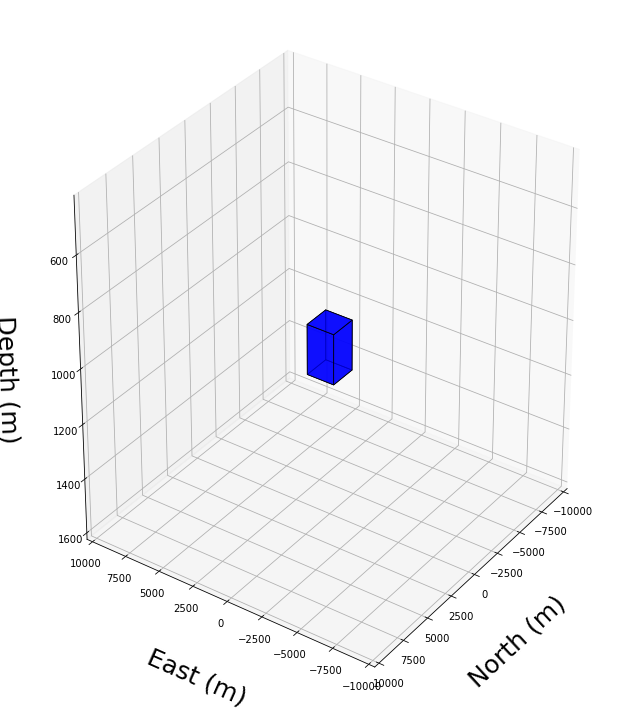

In [28]:
# coordenadas dos vertices (corners) do prisma, em metros:
x1,x2  = (-950.0, 950.0) 
y1,y2  = (-950.0, 950.0)
z1,z2  = (920.0, 1100.0)   # z eh positivo para baixo!
deltaz = 200.0
deltay = 4000.0
incl = 'positivo'

dic = {'n': 1,
       'x': [x1, x2],
       'y': [y1, y2],
       'z': [z1, z2],
       'deltay': deltay,
       'deltaz': deltaz,
       'incl': 'positivo'}

pointx, pointy, pointz = plot_3D.creat_point(**dic)

dic1 = {'x': [pointx[0], pointx[1]],
        'y': [pointy[0], pointy[1]],
        'z': [pointz[0], pointz[1]]}

vert1 =  plot_3D.vert_point(dic1)

color = 'b'
size = [9, 10]
view = [210,145]

prism_1 = plot_3D.plot_prism(vert1, color)

prism = {'n': 1,
         'prisma': [prism_1]}#, prism_2,prism_3]}

plot_3D.plot_obs_3d(prism, size, view, x, y, pointz)

RuntimeError: Can not put single artist in more than one figure

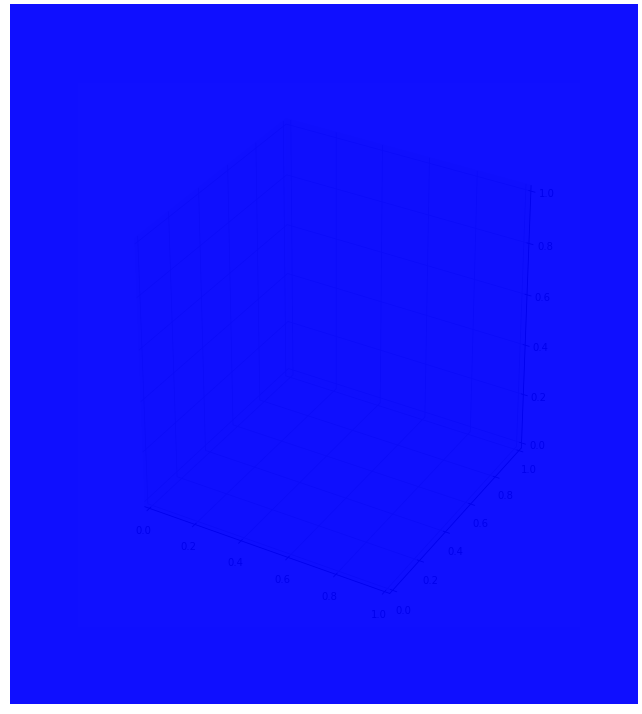

In [29]:
figure = plt.figure(figsize=(size[0],size[1]))
ax = figure.gca(projection = '3d')
    #----------------------------------------------------------------------------------------------------#
n = prism.get('n')
prisma = prism.get('prisma')

ax.add_collection3d(prism_1)
#----------------------------------------------------------------------------------------------------#
# Define the scale of the projection
x_scale = 1.2
y_scale = 1.2
z_scale = 1.
scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3] = 1.

    # Labels
ax.set_xlabel('North (m)', size = 25, labelpad = 30)
ax.set_ylabel('East (m)', size = 25, labelpad = 30)
ax.set_zlabel('Depth (m)', size = 25, labelpad = 30)
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.set_zlim(min(pointz)-500.0, max(pointz)+500.0)
    #ax.set_xticks(numpy.arange(x.min(), x.max(), 2500))
    #ax.set_yticks(numpy.linspace(y.min(), y.max(), 5))
    #ax.set_zticks(numpy.linspace(0., z[1], 6))
    #ax.tick_params(labelsize = 20, pad = 10)

    # Visualization angle
ax.view_init(view[0], view[1])

plt.tight_layout(True)
    #plt.savefig('prisma_3D.pdf', format='pdf')

plt.show()
